In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/kidney_disease.csv'
kidney_Disease = pd.read_csv(url)
kidney_Disease

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
kidney_Disease.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [6]:
kidney_Disease.isna().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [7]:
numeric_col = ['age' , 'bp' , 'sg' , 'al' , 'su' , 'bgr' , 'bu' , 'sc' , 'sod' , 'pot' , 'hemo' ]
for col in numeric_col:

    kidney_Disease[col] = kidney_Disease[col].fillna(kidney_Disease[col].mean())

kidney_Disease = kidney_Disease.infer_objects(copy=False)
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in categorical_columns:
    kidney_Disease[col] = kidney_Disease[col].fillna(kidney_Disease[col].mode()[0])

In [8]:
kidney_Disease.duplicated().sum()

0

In [9]:
kidney_Disease['id'].duplicated().sum()

0

In [10]:
kidney_Disease['id'].describe()

,id
count,400.000000
mean,199.500000
std,115.614301
min,0.000000
25%,99.750000
50%,199.500000
75%,299.250000
max,399.000000


In [11]:
kidney_Disease.index

RangeIndex(start=0, stop=400, step=1)

In [12]:
kidney_Disease['age'].describe()

,age
count,400.000000
mean,51.483376
std,16.974966
min,2.000000
25%,42.000000
50%,54.000000
75%,64.000000
max,90.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


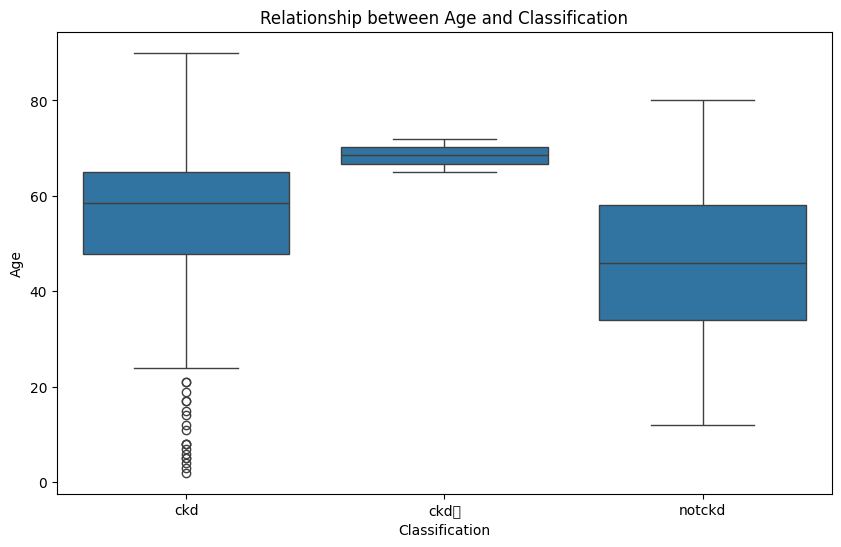

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='age', data=kidney_Disease)
plt.title('Relationship between Age and Classification')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.show()

In [14]:
kidney_Disease['bp'].describe()

,bp
count,400.000000
mean,76.469072
std,13.476298
min,50.000000
25%,70.000000
50%,78.234536
75%,80.000000
max,180.000000


In [15]:
bp_classification = kidney_Disease.groupby('bp')['classification'].value_counts().unstack()
bp_classification

classification,ckd,ckd\t,notckd
bp,,,
50.000000,5.0,NaN,NaN
60.000000,25.0,1.0,45.0
70.000000,74.0,NaN,38.0
76.469072,10.0,NaN,2.0
80.000000,50.0,1.0,65.0
90.000000,53.0,NaN,NaN
100.000000,25.0,NaN,NaN
110.000000,3.0,NaN,NaN
120.000000,1.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


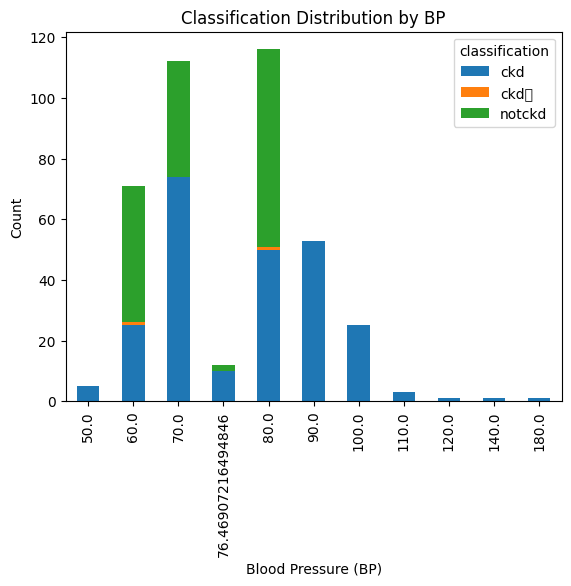

In [16]:
bp_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by BP')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


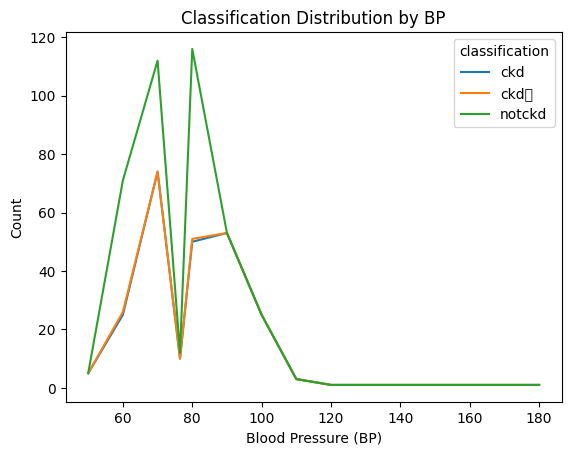

In [17]:
bp_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by BP')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Count')
plt.show()

In [18]:
kidney_Disease['sg'].describe()

,sg
count,400.000000
mean,1.017408
std,0.005369
min,1.005000
25%,1.015000
50%,1.017408
75%,1.020000
max,1.025000


In [19]:
sg_classification = kidney_Disease.groupby('sg')['classification'].value_counts().unstack()
sg_classification

classification,ckd,ckd\t,notckd
sg,,,
1.005000,7.0,NaN,NaN
1.010000,83.0,1.0,NaN
1.015000,75.0,NaN,NaN
1.017408,41.0,1.0,5.0
1.020000,31.0,NaN,75.0
1.025000,11.0,NaN,70.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


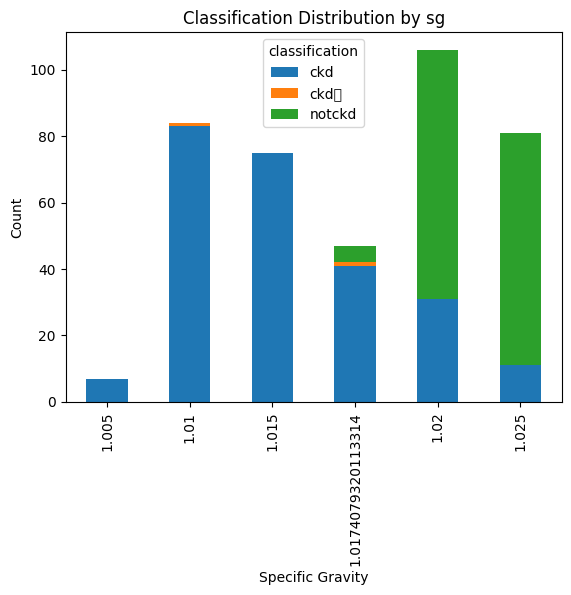

In [20]:
sg_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by sg')
plt.xlabel('Specific Gravity')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


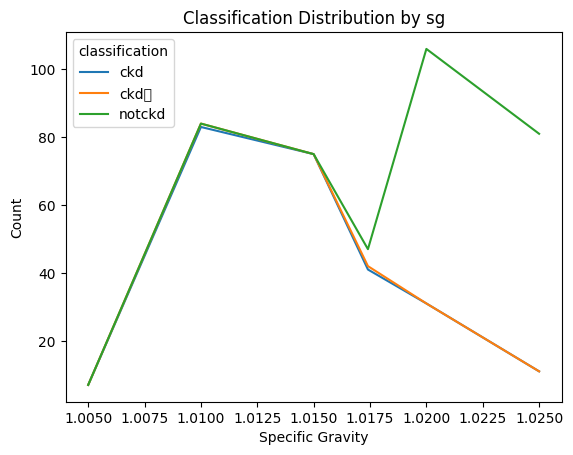

In [21]:
sg_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by sg')
plt.xlabel('Specific Gravity')
plt.ylabel('Count')
plt.show()

In [22]:
kidney_Disease['al'].describe()

,al
count,400.000000
mean,1.016949
std,1.272318
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [23]:
al_classification = kidney_Disease.groupby('al')['classification'].value_counts().unstack()
al_classification

classification,ckd,ckd\t,notckd
al,,,
0.000000,54.0,NaN,145.0
1.000000,44.0,NaN,NaN
1.016949,40.0,1.0,5.0
2.000000,42.0,1.0,NaN
3.000000,43.0,NaN,NaN
4.000000,24.0,NaN,NaN
5.000000,1.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


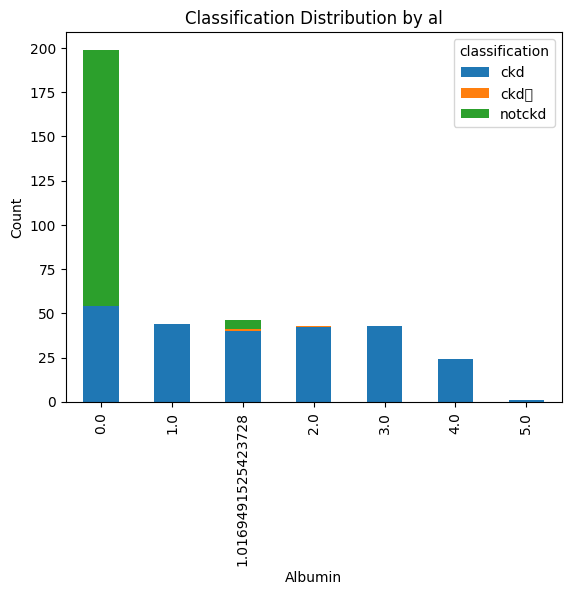

In [24]:
al_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by al')
plt.xlabel('Albumin')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


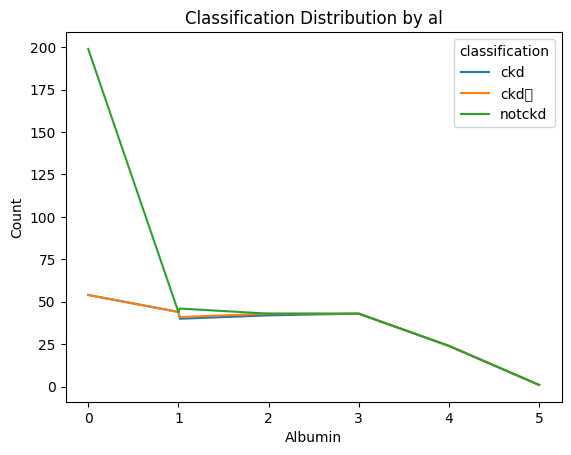

In [25]:
al_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by al')
plt.xlabel('Albumin')
plt.ylabel('Count')
plt.show()

In [26]:
kidney_Disease['su'].describe()

,su
count,400.000000
mean,0.450142
std,1.029487
min,0.000000
25%,0.000000
50%,0.000000
75%,0.450142
max,5.000000


In [27]:
su_classification = kidney_Disease.groupby('su')['classification'].value_counts().unstack()
su_classification

classification,ckd,ckd\t,notckd
su,,,
0.000000,144.0,1.0,145.0
0.450142,43.0,1.0,5.0
1.000000,13.0,NaN,NaN
2.000000,18.0,NaN,NaN
3.000000,14.0,NaN,NaN
4.000000,13.0,NaN,NaN
5.000000,3.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


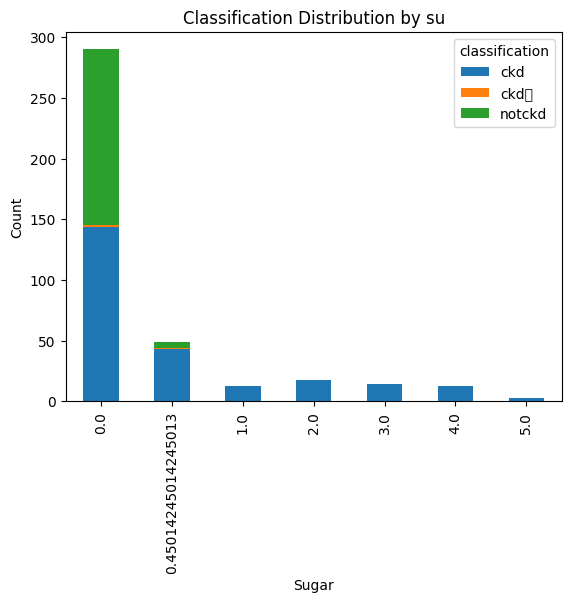

In [28]:
su_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by su')
plt.xlabel('Sugar')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


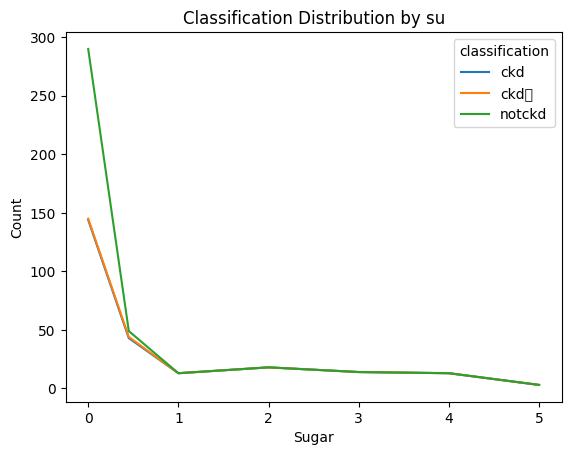

In [29]:
su_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by su')
plt.xlabel('Sugar')
plt.ylabel('Count')
plt.show()

In [30]:
kidney_Disease['rbc'].describe()

,rbc
count,400
unique,2
top,normal
freq,353


In [31]:
rbc_classification = kidney_Disease.groupby('rbc')['classification'].value_counts().unstack()
rbc_classification

classification,ckd,ckd\t,notckd
rbc,,,
abnormal,47.0,NaN,NaN
normal,201.0,2.0,150.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


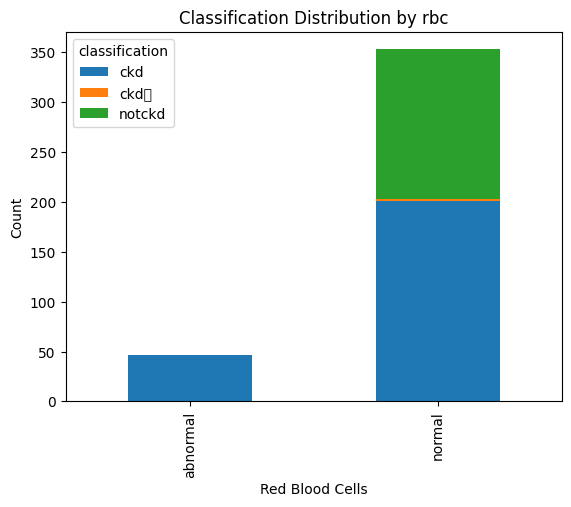

In [32]:
rbc_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by rbc')
plt.xlabel('Red Blood Cells')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


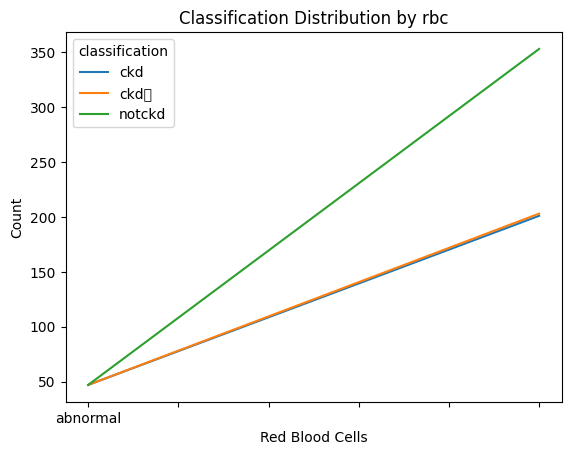

In [33]:
rbc_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by rbc')
plt.xlabel('Red Blood Cells')
plt.ylabel('Count')
plt.show()

In [34]:
kidney_Disease['pc'].describe()

,pc
count,400
unique,2
top,normal
freq,324


In [35]:
pc_classification = kidney_Disease.groupby('pc')['classification'].value_counts().unstack()
pc_classification

classification,ckd,ckd\t,notckd
pc,,,
abnormal,75.0,1.0,NaN
normal,173.0,1.0,150.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


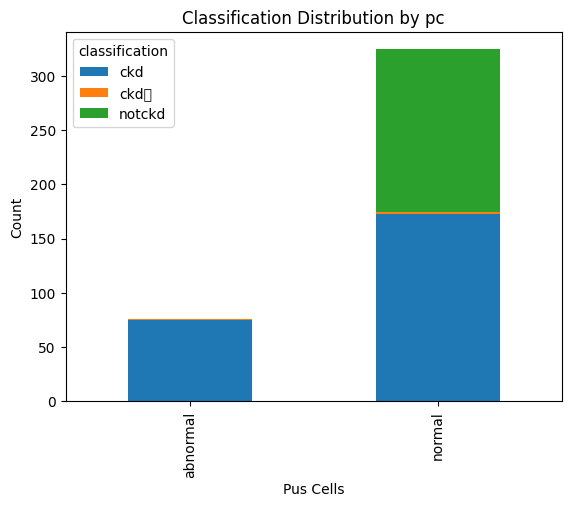

In [36]:
pc_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by pc')
plt.xlabel('Pus Cells')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


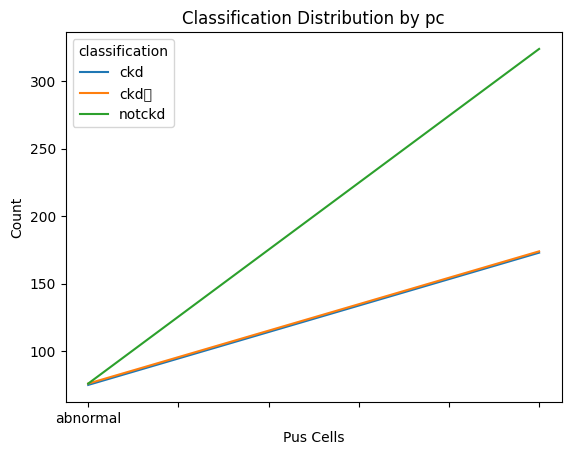

In [37]:
pc_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by pc')
plt.xlabel('Pus Cells')
plt.ylabel('Count')
plt.show()

In [38]:
kidney_Disease['pcc'].describe()

,pcc
count,400
unique,2
top,notpresent
freq,358


In [39]:
pcc_classification = kidney_Disease.groupby('pcc')['classification'].value_counts().unstack()
pcc_classification

classification,ckd,ckd\t,notckd
pcc,,,
notpresent,207.0,1.0,150.0
present,41.0,1.0,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


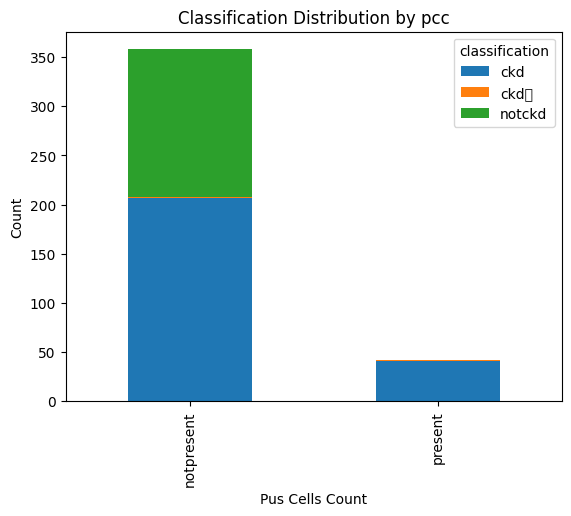

In [40]:
pcc_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by pcc')
plt.xlabel('Pus Cells Count')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


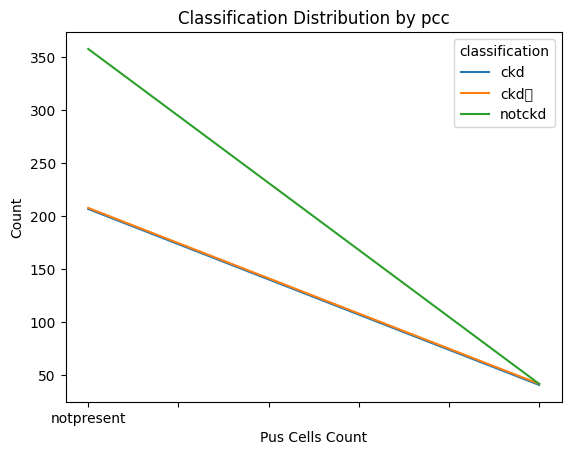

In [41]:
pcc_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by pcc')
plt.xlabel('Pus Cells Count')
plt.ylabel('Count')
plt.show()

In [42]:
kidney_Disease['ba'].describe()


,ba
count,400
unique,2
top,notpresent
freq,378


In [43]:
ba_classification = kidney_Disease.groupby('ba')['classification'].value_counts().unstack()
ba_classification

classification,ckd,ckd\t,notckd
ba,,,
notpresent,226.0,2.0,150.0
present,22.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


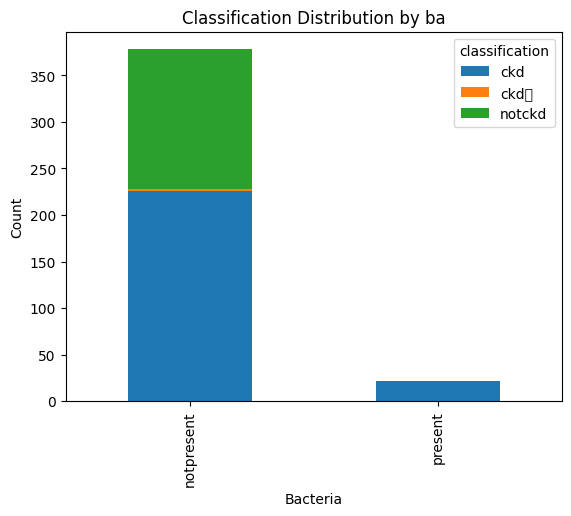

In [44]:
ba_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by ba')
plt.xlabel('Bacteria')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


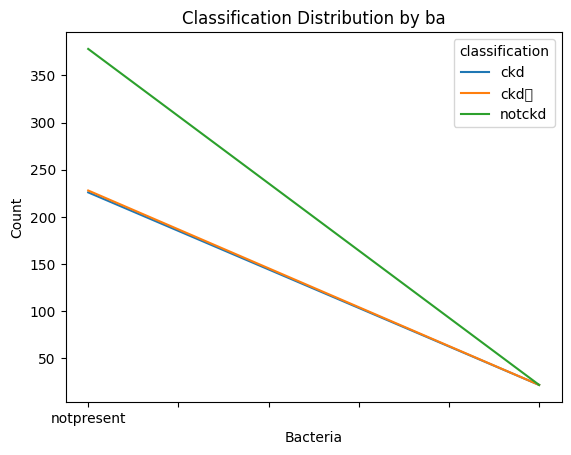

In [45]:
ba_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by ba')
plt.xlabel('Bacteria')
plt.ylabel('Count')
plt.show()

In [46]:
kidney_Disease['pcv'].describe()

,pcv
count,330
unique,44
top,41
freq,21


In [47]:
pcv_classification = kidney_Disease.groupby('pcv')['classification'].value_counts().unstack()
pcv_classification

classification,ckd,ckd\t,notckd
pcv,,,
\t43,1.0,NaN,NaN
\t?,1.0,NaN,NaN
14,1.0,NaN,NaN
15,1.0,NaN,NaN
16,1.0,NaN,NaN
17,1.0,NaN,NaN
18,1.0,NaN,NaN
19,2.0,NaN,NaN
20,1.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


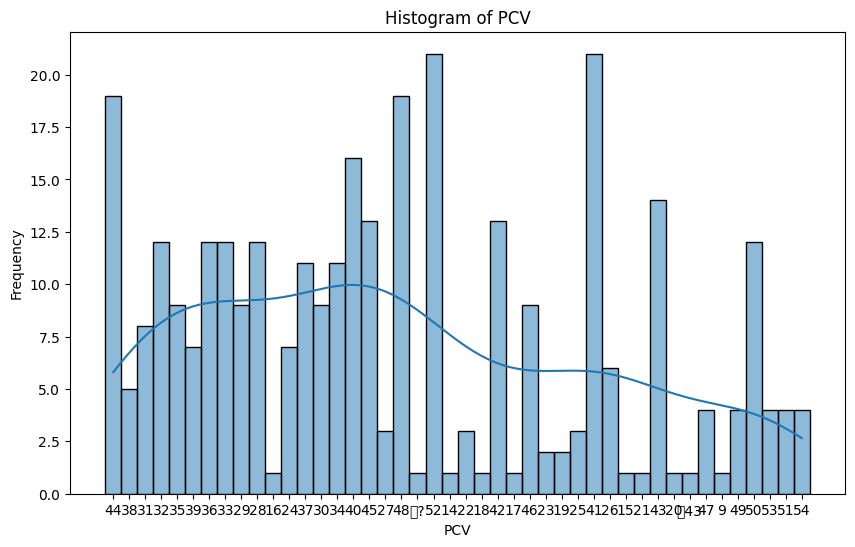

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(kidney_Disease['pcv'], bins=20, kde=True)
plt.title('Histogram of PCV')
plt.xlabel('PCV')
plt.ylabel('Frequency')
plt.show()

In [49]:
kidney_Disease['wc'].describe()

,wc
count,295
unique,92
top,9800
freq,11


In [50]:
wc_classification = kidney_Disease.groupby('wc')['classification'].value_counts().unstack()
wc_classification

classification,ckd,ckd\t,notckd
wc,,,
\t6200,1.0,NaN,NaN
\t8400,1.0,NaN,NaN
\t?,1.0,NaN,NaN
10200,4.0,NaN,1.0
10300,2.0,NaN,2.0
...,...,...,...
9500,1.0,1.0,3.0
9600,6.0,NaN,3.0
9700,NaN,NaN,1.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


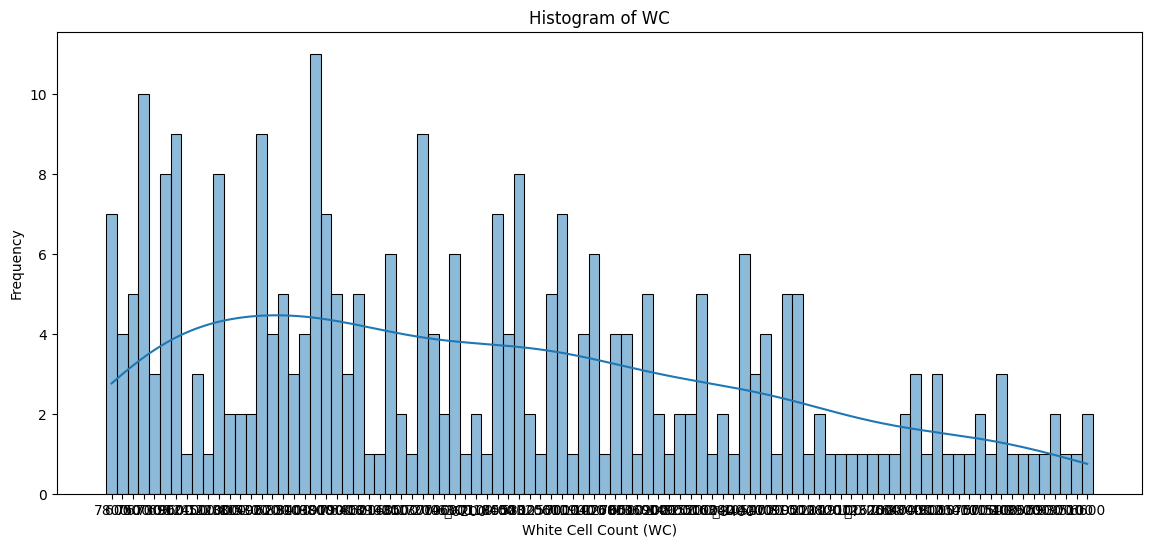

In [51]:
plt.figure(figsize=(14, 6))
sns.histplot(kidney_Disease['wc'], bins=20, kde=True)
plt.title('Histogram of WC')
plt.xlabel('White Cell Count (WC)')
plt.ylabel('Frequency')
plt.show()

In [52]:
kidney_Disease['rc'].describe()

,rc
count,270
unique,49
top,5.2
freq,18


In [53]:
rc_classification = kidney_Disease.groupby('rc')['classification'].value_counts().unstack()
rc_classification

classification,ckd,ckd\t,notckd
rc,,,
\t?,1.0,NaN,NaN
2.1,2.0,NaN,NaN
2.3,1.0,NaN,NaN
2.4,1.0,NaN,NaN
2.5,1.0,1.0,NaN
2.6,2.0,NaN,NaN
2.7,2.0,NaN,NaN
2.8,2.0,NaN,NaN
2.9,2.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


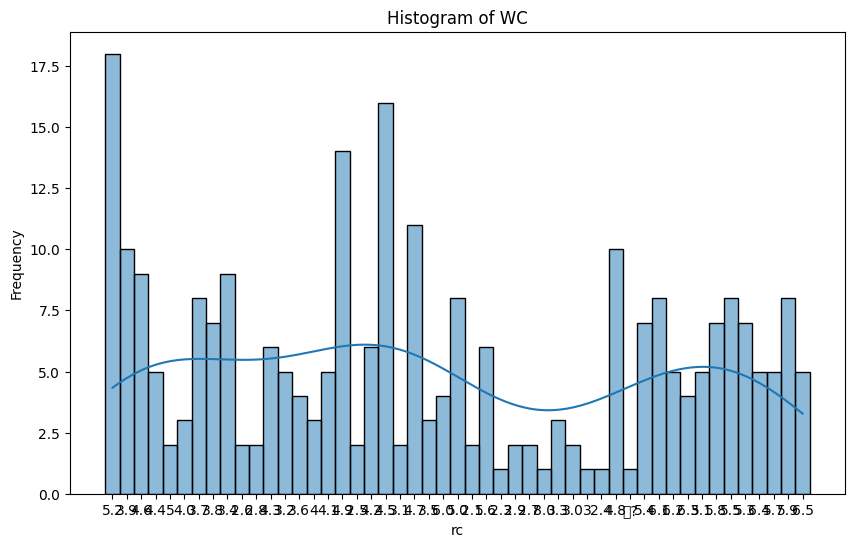

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(kidney_Disease['rc'], bins=20, kde=True)
plt.title('Histogram of WC')
plt.xlabel('rc')
plt.ylabel('Frequency')
plt.show()

In [55]:
kidney_Disease['htn'].describe()

,htn
count,400
unique,2
top,no
freq,253


In [56]:
htn_classification = kidney_Disease.groupby('htn')['classification'].value_counts().unstack()
htn_classification

classification,ckd,ckd\t,notckd
htn,,,
no,103.0,NaN,150.0
yes,145.0,2.0,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


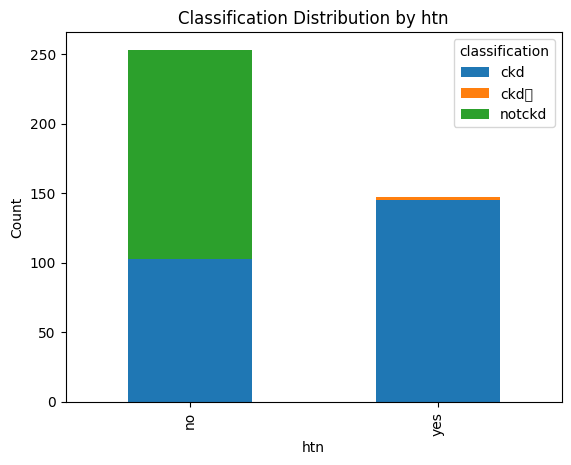

In [57]:
htn_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by htn')
plt.xlabel('htn')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


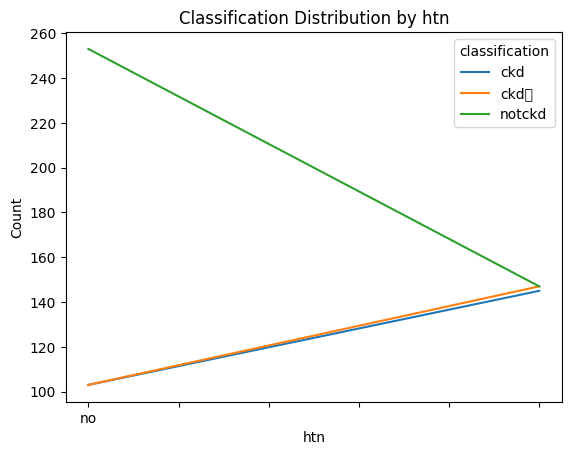

In [58]:
htn_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by htn')
plt.xlabel('htn')
plt.ylabel('Count')
plt.show()

In [59]:
kidney_Disease['dm'].describe()

,dm
count,400
unique,5
top,no
freq,260


In [60]:
dm_classification = kidney_Disease.groupby('dm')['classification'].value_counts().unstack()
dm_classification

classification,ckd,ckd\t,notckd
dm,,,
\tno,3.0,NaN,NaN
\tyes,2.0,NaN,NaN
yes,1.0,NaN,NaN
no,110.0,NaN,150.0
yes,132.0,2.0,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


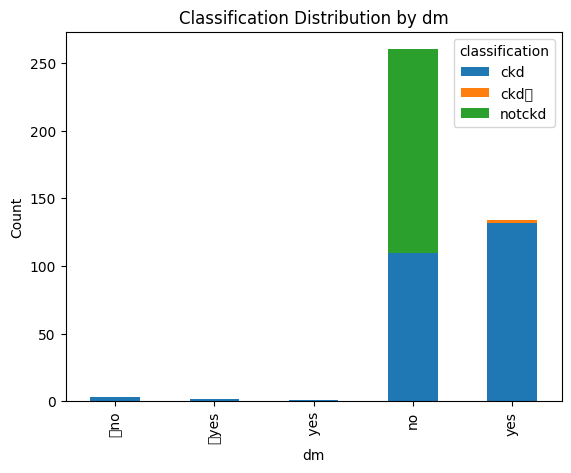

In [61]:
dm_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by dm')
plt.xlabel('dm')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


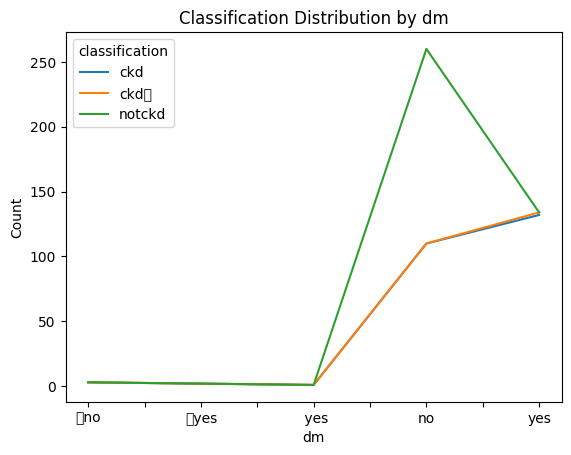

In [62]:
dm_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by dm')
plt.xlabel('dm')
plt.ylabel('Count')
plt.show()

In [63]:
kidney_Disease['cad'].describe()

,cad
count,400
unique,3
top,no
freq,364


In [64]:
cad_classification = kidney_Disease.groupby('cad')['classification'].value_counts().unstack()
cad_classification

classification,ckd,ckd\t,notckd
cad,,,
\tno,2.0,NaN,NaN
no,212.0,2.0,150.0
yes,34.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


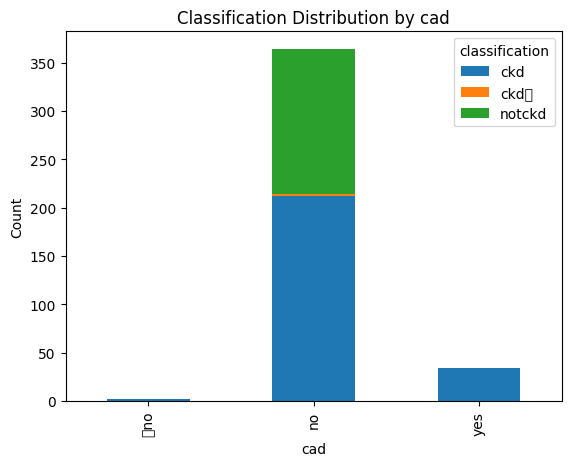

In [65]:
cad_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by cad')
plt.xlabel('cad')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


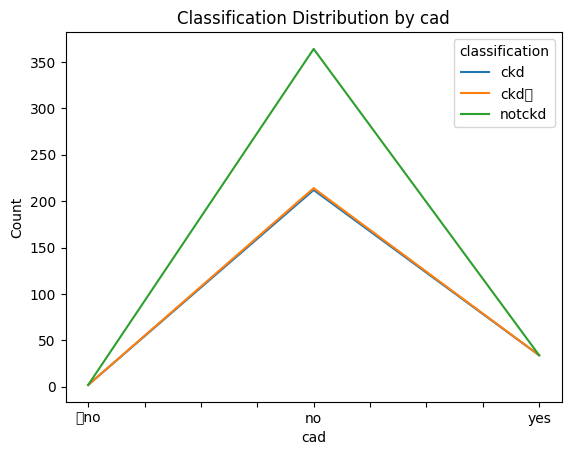

In [66]:
cad_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by cad')
plt.xlabel('cad')
plt.ylabel('Count')
plt.show()

In [67]:
kidney_Disease['appet'].describe()

,appet
count,400
unique,2
top,good
freq,318


In [68]:
appet_classification = kidney_Disease.groupby('appet')['classification'].value_counts().unstack()
appet_classification

classification,ckd,ckd\t,notckd
appet,,,
good,168.0,NaN,150.0
poor,80.0,2.0,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


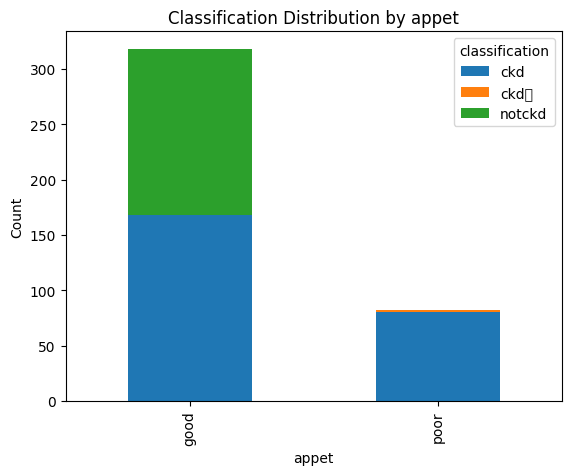

In [69]:
appet_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by appet')
plt.xlabel('appet')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


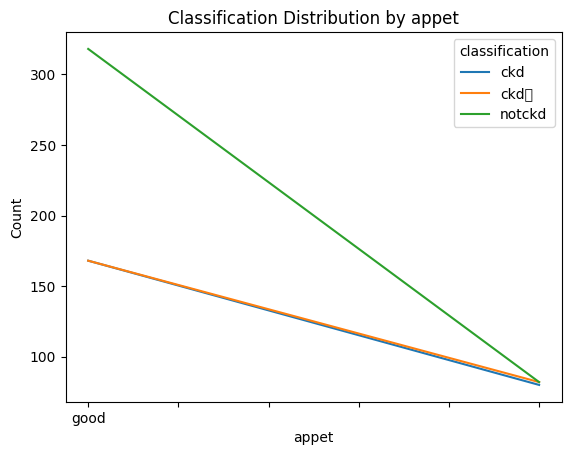

In [70]:
appet_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by appet')
plt.xlabel('appet')
plt.ylabel('Count')
plt.show()

In [71]:
kidney_Disease['pe'].describe()

,pe
count,400
unique,2
top,no
freq,324


In [72]:
pe_classification = kidney_Disease.groupby('pe')['classification'].value_counts().unstack()
pe_classification

classification,ckd,ckd\t,notckd
pe,,,
no,172.0,2.0,150.0
yes,76.0,NaN,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


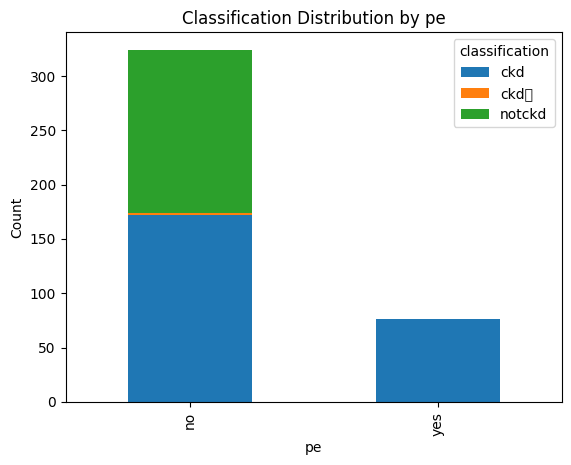

In [73]:
pe_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by pe')
plt.xlabel('pe')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


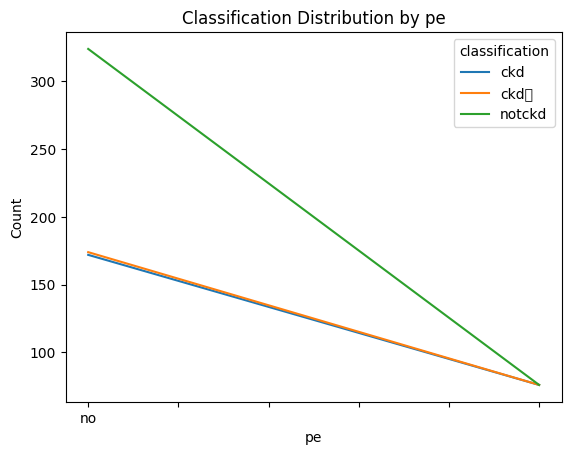

In [74]:
pe_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by pe')
plt.xlabel('pe')
plt.ylabel('Count')
plt.show()

In [75]:
kidney_Disease['ane'].describe()

,ane
count,400
unique,2
top,no
freq,340


In [76]:
ane_classification = kidney_Disease.groupby('ane')['classification'].value_counts().unstack()
ane_classification

classification,ckd,ckd\t,notckd
ane,,,
no,189.0,1.0,150.0
yes,59.0,1.0,NaN


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


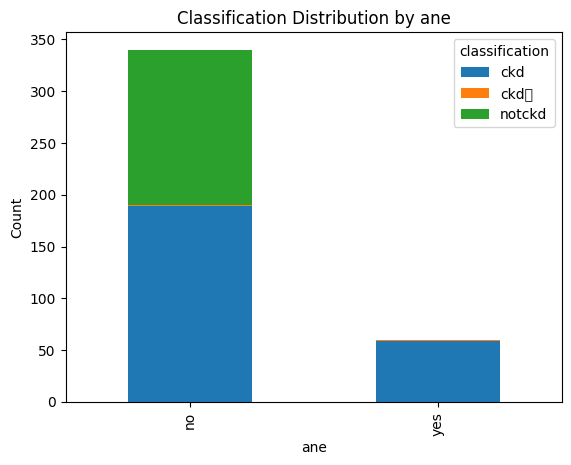

In [77]:
ane_classification.plot(kind='bar' , stacked=True)
plt.title('Classification Distribution by ane')
plt.xlabel('ane')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


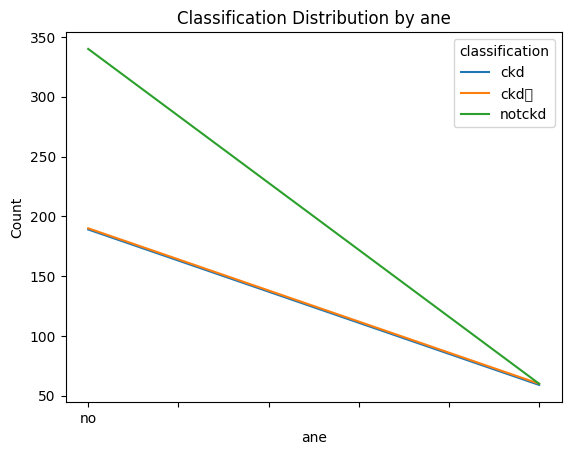

In [78]:
ane_classification.plot(kind='line' , stacked=True)
plt.title('Classification Distribution by ane')
plt.xlabel('ane')
plt.ylabel('Count')
plt.show()